In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import grangercausalitytests 

In [19]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML471_S4_Datafile_Concept.csv")

df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

y = df['Consumption']
exog = df['Festivals/Special_events']

train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
exog_train, exog_test = exog[:train_size], exog[train_size:]

print("Granger Casuality Test Results:")

granger_data = df[['Consumption', 'Festivals/Special_events']]
grangercausalitytests(granger_data, maxlag=12, verbose=True)

model = SARIMAX(y_train, exog=exog_train, order=(1, 0 ,2), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

forecast = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=exog_test, dynamic=False)

mae = mean_absolute_error(y_test, forecast)
rmse = root_mean_squared_error(y_test, forecast)
mape = mean_absolute_percentage_error(y_test, forecast)

print(f"MAE: {mae: .4f}")
print(f"RMSE: {rmse: .4f}")
print(f"MAPE: {mape: .4f}")


Granger Casuality Test Results:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3712  , p=0.0120  , df_denom=393, df_num=1
ssr based chi2 test:   chi2=6.4199  , p=0.0113  , df=1
likelihood ratio test: chi2=6.3684  , p=0.0116  , df=1
parameter F test:         F=6.3712  , p=0.0120  , df_denom=393, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.6644 , p=0.0000  , df_denom=390, df_num=2
ssr based chi2 test:   chi2=27.6791 , p=0.0000  , df=2
likelihood ratio test: chi2=26.7524 , p=0.0000  , df=2
parameter F test:         F=13.6644 , p=0.0000  , df_denom=390, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1172  , p=0.0261  , df_denom=387, df_num=3
ssr based chi2 test:   chi2=9.5208  , p=0.0231  , df=3
likelihood ratio test: chi2=9.4076  , p=0.0243  , df=3
parameter F test:         F=3.1172  , p=0.0261  , df_denom=387, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                          Consumption   No. Observations:                  317
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -643.379
Date:                              Fri, 30 Jan 2026   AIC                           1298.758
Time:                                      15:24:55   BIC                           1320.777
Sample:                                  01-01-1988   HQIC                          1307.580
                                       - 05-01-2014                                         
Covariance Type:                                opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Festivals/Special_events     0.0871      0.060      1.454      0.146  

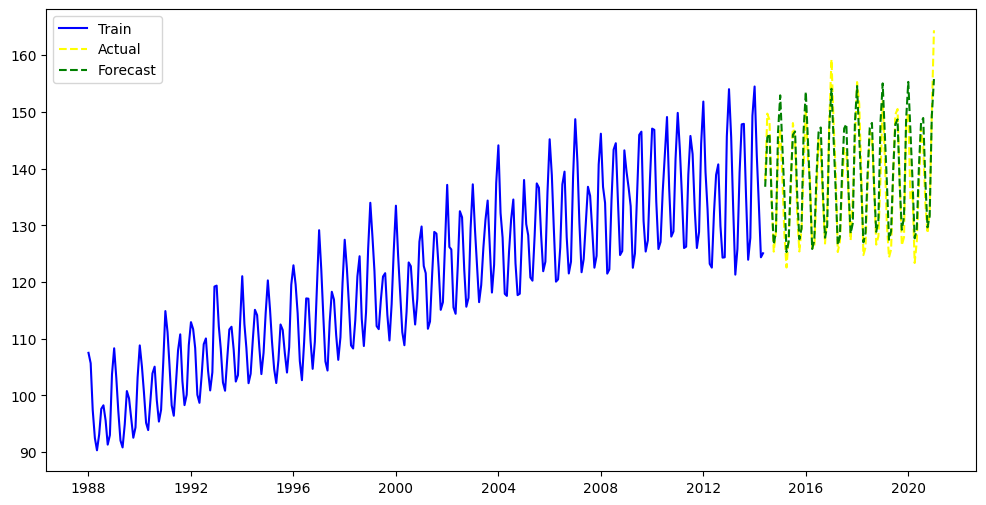

In [22]:
plt.figure(figsize=(12,6))
plt.plot(y_train.index, y_train, label='Train', color='blue')
plt.plot(y_test.index, y_test, label='Actual', color='yellow', linestyle='--')
plt.plot(y_test.index, forecast, label='Forecast', color='green', linestyle='--')
plt.legend()
plt.show()